In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [14]:
os.chdir('../images/dogs-vs-cats')

In [40]:
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('../dogs-vs-cats/train/cat*'), 500):
        shutil.move(c, 'train/cat')
    for c in random.sample(glob.glob('../dogs-vs-cats/train/dog*'), 500):
        shutil.move(c, 'train/dog')
    for c in random.sample(glob.glob('../dogs-vs-cats/train/cat*'), 100):
        shutil.move(c, 'valid/cat')
    for c in random.sample(glob.glob('../dogs-vs-cats/train/dog*'), 100):
        shutil.move(c, 'valid/dog')
    for c in random.sample(glob.glob('../dogs-vs-cats/train/cat*'), 50):
        shutil.move(c, 'test/cat')
    for c in random.sample(glob.glob('../dogs-vs-cats/train/dog*'), 50):
        shutil.move(c, 'test/dog')


In [41]:
os.chdir('../../')

In [50]:
train_path = 'images/dogs-vs-cats/train'
valid_path = 'images/dogs-vs-cats/valid'
test_path = 'images/dogs-vs-cats/test'

In [53]:
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(directory=train_path, 
                      target_size=(224, 224), 
                      classes=['cat', 'dog'], 
                      batch_size=10)
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(directory=valid_path, 
                      target_size=(224, 224), 
                      classes=['cat', 'dog'], 
                      batch_size=10)
test_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
).flow_from_directory(directory=test_path, 
                      target_size=(224, 224), 
                      classes=['cat', 'dog'], 
                      batch_size=10, 
                      shuffle=False)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [55]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [56]:
imgs, labels = next(train_batches)

In [61]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

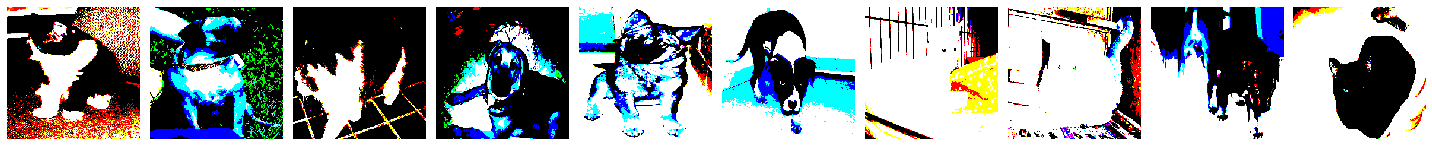

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [62]:
plotImages(imgs)
print(labels)